<a href="https://colab.research.google.com/github/ethanmacrae/classification-predict-streamlit-template/blob/master/Classification%20Predict%20Notebook%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                  CLIMATE CHANGE BELIEF ANALYSIS

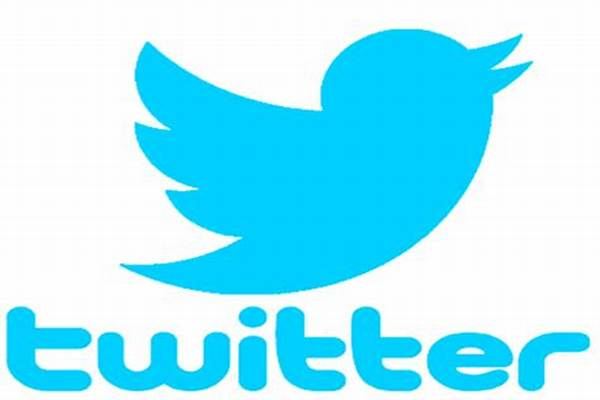

Team 14:
1. Mmathabo Pule
2. Zanele Lushaba
3. Sebaka Mogano
4. Ethan Macrae

# Introduction

In recent years many companies have adopted the use of social media platforms and social media data as an alternative way to engage with customers for a fast and effective response to improve customer experience,  build brand awareness and increase customer base through targeted advertisement.The data generated within social media is classified as unstructured data, the sentiments from this data are analysed using Natural Langauge Processing which refers to a process of analysing text to determine the author's emotion or attitude toward a topic. Sentiments analysis assist companies to gain better insight into the author's attitude towards their brands, products, and services.


### Problem Statement
Many businesses have made significant commitments to demonstrate that acting on climate change is good for the earth and
is also a smart business strategy. There has been a growing demand for companies to analyse social media data with the intention of gauging how their product/service may be received by consumers. This will aslo assist companies access a broad base of consumer sentiment, spanning multiple demographic and geographic categories for better informative future marketing strategies.


### Objectives of the Research
The key objectives of this research project are as follow:

- Perform data analysis to investigate if there are any errors and unnecessary data 
- Perform data cleaning to remove unnecessary data and errors
- Perform EDA to gain better insight of the data
- Create engineering features to improve the performance of the model
- Build a model that is capable of classifying whether or not a person believes in climate change based on the tweet data 
- Evaluate the accuracy of the best machine learning model
 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Preprocessing</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Conclusion</a>

<a href=#nine>9. References</a>

 <a id="one"></a>
### Comet Experiement
Comet will be used for version control

In [ ]:
# import comet_ml at the top of your file
import comet_ml

In [ ]:
# import comet_ml at the top of your file

from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="uIA4LnUcw5MgXtaoZFKhjA8kp",
    project_name="team-14-classification",
    workspace="bravo",
)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/bravo/team-14-classification/2a2e98636c0b4a90967d0f16076e25b7
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     git metadata        : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET ERROR: Error sending a notification, make sure you have opted-in for notifications
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/bravo/team-14-classificati

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


In [11]:
# Data manipulation
import re
import nltk
import datetime
import pandas as pd
import numpy as np
nltk.download('wordnet')
nltk.download('stopwords')
#import unidecode
#import unicodedata
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import word_tokenize, pos_tag, pos_tag_sents
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter


# Libraries for data preparation and model building
import pickle
from sklearn.pipeline import Pipeline
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats import boxcox, zscore
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score

# Visualizations
#import plotly.express as px
#import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [12]:
df_train = pd.read_csv('https://raw.githubusercontent.com/ethanmacrae/classification-predict-streamlit-template/master/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/ethanmacrae/classification-predict-streamlit-template/master/test_with_no_labels.csv')

### Data size and Structure

In [13]:
#view train dataset
display(df_train.head())

#looking at the information of the train dataset
df_train.info()

#looking at the shape of the train dataset
df_train.shape


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


(15819, 3)

- The dataset has 15819 entries and 3 variables that do not have null values. There are two interger variables and one object variable.

In [14]:
#view train dataset
display(df_test.head())

#looking at the information of the test dataset
df_test.info()

#looking at the shape of the test dataset
df_test.shape



,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


(10546, 2)

- The dataset has 10546 entries and 2 variables that do not have null values. There is one interger variables and one object variable.

<a id="three"></a>
## 3. Data Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| 

---


To remove the noise caused by connectors or otherwise called Stop words remove special characters, spaces or Tabs emojies,urls,hashtags.

In [24]:
def processing(tweet):
    
    
    tweet = tweet.lower()
    tweet = re.sub(r'http[s]?:\/\/\S+', '', tweet) # Remove url's
    tweet = re.sub(r'@[A-Za-z0-9]+','',tweet)  # Remove @mentions 
    tweet = re.sub(r'#\w*', '', tweet)  # Remove hashtags    
    tweet = re.sub(r'\d+', '', tweet)  # Remove numbers  
    tweet = re.sub(r"[_,-.;':#?!\&/$]+\ *", ' ', tweet)  # Remove punctuation
    tweet = re.sub(r"U+FFFD ", ' ', tweet)     # Remove that funny diamond
    tweet = re.sub(r'\s\s+', ' ', tweet) # Remove extra whitespace
    tweet = re.sub(r'rt[\s]+', '', tweet)
    tweet = tweet.lstrip(' ') # Remove space in front of tweet
    
    
    return tweet
# Clean the tweets in the "message" column
df_train['new_message'] = df_train.message.apply(processing)
df_test['new_message'] = df_test.message.apply(processing)

In [25]:
display(df_train.head())
display(df_test.head())

,sentiment,message,tweetid,new_message
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief doesn t think carbon di...
1,1,It's not like we lack evidence of anthropogeni...,126103,it s not like we lack evidence of anthropogeni...
2,2,RT @RawStory: Researchers say we have three ye...,698562,researchers say we have three years to act on ...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,wired was a pivotal year in the war on climate...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,it s and a racist sexist climate change denyin...


,message,tweetid,new_message
0,Europe will now be looking to China to make su...,169760,europe will now be looking to china to make su...
1,Combine this with the polling of staffers re c...,35326,combine this with the polling of staffers re c...
2,"The scary, unimpeachable evidence that climate...",224985,the scary unimpeachable evidence that climate ...
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,putin got to you too jill trump doesn t believ...
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,female orgasms cause global warming sarcastic ...


In [32]:
nltk.download('stopwords')
nltk.download('punkt')
def stopword(tweet):
    sw = [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Lemmatisation

In [26]:
#Stemming and Lemma
lemma = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [33]:
display(df_train.head())
display(df_test.head())

,sentiment,message,tweetid,new_message
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief doesn t think carbon di...
1,1,It's not like we lack evidence of anthropogeni...,126103,it s not like we lack evidence of anthropogeni...
2,2,RT @RawStory: Researchers say we have three ye...,698562,researchers say we have three years to act on ...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,wired was a pivotal year in the war on climate...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,it s and a racist sexist climate change denyin...


,message,tweetid,new_message
0,Europe will now be looking to China to make su...,169760,europe will now be looking to china to make su...
1,Combine this with the polling of staffers re c...,35326,combine this with the polling of staffers re c...
2,"The scary, unimpeachable evidence that climate...",224985,the scary unimpeachable evidence that climate ...
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,putin got to you too jill trump doesn t believ...
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,female orgasms cause global warming sarcastic ...


In [34]:
def lemmatize(tweet):
    from sklearn import preprocessing
    word_pos_tag = nltk.pos_tag(word_tokenize(tweet))
    x = [lemma.lemmatize(tag[0],get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tag)]
    return " ".join(x)

In [29]:
#def finalprocess(tweet):
    #return lemmatize(stopword(processing(tweet)))

#df_train['sentiment'] = df_train['message'].apply(lambda x: finalprocess(x))
#df_train.head()

In [35]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

<a id="four"></a>
## 4. Exploratory Data Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, to gain a better understanding of the data, we did a basic analysis of the dataframe to get an overview of the contents in the table. Moreover, we performed various statistical analysis methods and visualiations to gauge two main things. firstly, the relationship between the target variable(load_shortfall_3h) and the independent variables. Secondly, the relationship between the independent variables themselves. This analysis will aid us in determining which independant variables are relevant and weather or not we should remove or engineer new variables. |

---

# Predictor vs Target Variables


In [42]:
X =  df_train["new_message"]
y = df_train['sentiment']

In [43]:
#Creating the Test Train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [44]:
tfidf=TfidfVectorizer(max_features= 10546 ,ngram_range=(1, 2 ))

In [45]:
tf_X_train=tfidf.fit_transform(X_train)
tf_X_test=tfidf.transform(X_test)

# Selection of Models
- We decided to use a few different types of models for our data set
## Models Used


### Training and Fitting the data on our selected models

In [46]:
#Creating the Support vector Machine Model
sclf = svm.SVC(kernel='linear', C = 1.0)
#clf=LinearSVC()
sclf.fit(tf_X_train,y_train)

NameError: ignored

In [47]:
#Creating the Random Forest Regression Model

classifier = RandomForestClassifier()
classifier.fit(tf_X_train, y_train)

RandomForestClassifier()

In [48]:
#Creating the Decision Tree Regression Model
dclf = DecisionTreeClassifier()
dclf = dclf.fit(tf_X_train,y_train)

# Creating Predictions on our Data

In [ ]:
# get predictions for testing data
Random_pred=classifier .predict(tf_X_test)
Svm_pred=clf .predict(tf_X_test)
Decision_pred=dclf .predict(tf_X_test)



<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

# Results


In [ ]:
#Random Forest
print(classification_report(y_test,Random_pred))



              precision    recall  f1-score   support

          -1       0.85      0.19      0.31       279
           0       0.70      0.39      0.50       464
           1       0.70      0.90      0.79      1691
           2       0.77      0.72      0.74       730

    accuracy                           0.72      3164
   macro avg       0.76      0.55      0.59      3164
weighted avg       0.73      0.72      0.69      3164



In [ ]:
#support vector machine
print(classification_report(y_test,Svm_pred))


              precision    recall  f1-score   support

          -1       0.78      0.42      0.54       279
           0       0.70      0.46      0.55       464
           1       0.77      0.90      0.83      1691
           2       0.79      0.78      0.79       730

    accuracy                           0.77      3164
   macro avg       0.76      0.64      0.68      3164
weighted avg       0.76      0.77      0.75      3164



In [ ]:
#Decision tree
print(classification_report(y_test,Decision_pred))

              precision    recall  f1-score   support

          -1       0.47      0.37      0.41       279
           0       0.42      0.46      0.44       464
           1       0.72      0.73      0.73      1691
           2       0.62      0.64      0.63       730

    accuracy                           0.64      3164
   macro avg       0.56      0.55      0.55      3164
weighted avg       0.64      0.64      0.63      3164



# Final Model Creation and CSV export
- using our svm Model we created our prediction for the Test Data set with the following predictor columns
- dropped time from our test set 

In [ ]:
y_test = test_df['message']

In [ ]:
test_final = tfidf.transform(y_test)

In [ ]:
predictions = clf.predict(test_final)

In [ ]:
submission = pd.DataFrame({'tweetid': test_df.tweetid, 'sentiment': predictions})
submission.to_csv('sebaka_submission.csv', index=False)

# Final Model
- Very low RMSE score of 3491, Random Forest was the best predictor of our Dataset

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

# comet



In [ ]:
# log hash of your dataset to Comet.ml
experiment.log_dataset_hash(df)

NameError: name 'experiment' is not defined